In [1]:
import pandas as pd
import datetime
import seaborn as sns

Задание 1. Загрузка данных из файлов


In [3]:
t1 = tutorial_completed = pd.read_csv(r"C:\Users\Admin\Downloads\hw_lesson02_tutorial_completed.csv")
s1 = sessions = pd.read_excel(r"C:\Users\Admin\Downloads\hw_lesson02_sessions.xlsx")

In [4]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167890 entries, 0 to 167889
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           167890 non-null  object        
 1   region            167890 non-null  object        
 2   device            167890 non-null  object        
 3   channel           167890 non-null  object        
 4   session_duration  167890 non-null  float64       
 5   session_start     167890 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 7.7+ MB


In [5]:
tutorial_completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59857 entries, 0 to 59856
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       59857 non-null  object
 1   event_name    59857 non-null  object
 2   event_dt      59857 non-null  object
 3   duration_sec  59857 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
sessions.head()

,user_id,region,device,channel,session_duration,session_start
0,d35ad20dd45d,SEA,iPhone,GameAds,2589.186227,2020-04-01 17:51:25
1,ac4a113c52c_,CIS,iPhone,GameAds,1467.539334,2020-04-01 09:39:33
2,d0337d117cc8,CIS,iPhone,GameAds,3777.737508,2020-04-01 01:19:56
3,2f8c_262-_85,North America,iPhone,GameAds,3755.966201,2020-04-01 11:21:54
4,4b1-114-4692,Europe,iPhone,GameAds,2898.802314,2020-04-01 18:29:57


In [7]:
tutorial_completed.head()

,user_id,event_name,event_dt,duration_sec
0,--0-b0cbb8-a,tutorial_completed,2020-06-08 13:46:07,951
1,--014ca35_b7,tutorial_completed,2020-05-09 04:20:13,1143
2,--0424774bcb,tutorial_completed,2020-05-30 07:23:05,3758
3,--043682a1ad,tutorial_completed,2020-05-15 03:14:40,1326
4,--05-26b0-6b,tutorial_completed,2020-05-20 13:07:08,2828


In [8]:
display(sessions["channel"].value_counts(),sessions["region"].value_counts())

channel
BrainPlus    77660
JetAds       38526
GameAds      34970
SenseAds     16734
Name: count, dtype: int64

region
CN               33116
North America    28260
CIS              26187
Europe           23413
South America    19962
Africa           15049
SEA              12356
Australia         9547
Name: count, dtype: int64

In [9]:
display(sessions["user_id"]. value_counts(),sessions["device"].value_counts())

user_id
-899360ad4b1    27
10295d43ff--    26
513_16ad5-3_    26
5f970b6054f-    24
da2d13c24800    24
                ..
1b5f15fa19_5     1
bad-1c5f909f     1
c1060a_f-4bf     1
a_54-4d1324-     1
-175c05_40d3     1
Name: count, Length: 83185, dtype: int64

device
Andoroid    116186
iPhone       51704
Name: count, dtype: int64

In [10]:
display(tutorial_completed["event_name"].unique(), tutorial_completed["user_id"].value_counts())

array(['tutorial_completed'], dtype=object)

user_id
--0-b0cbb8-a    1
779ff_0cd_cd    1
778b987af85c    1
778dc-_4d681    1
778fb71b710b    1
               ..
--45_0d77-b4    1
--468c2dd_-5    1
--46f__-7f46    1
--4748458509    1
fffa9419ccf6    1
Name: count, Length: 59857, dtype: int64

В датафрейме tutorial_completed существуют 2 переменных с категориальными данными: user_id и event_name;event_name принимает только одно значение - "tutorial_completed", а user_id - уникальный идентификатор пользователя. 
В датафрейме sessions существуют 4 переменных с категориальными данными: user_id, region, device, channel; user_id - уникальный идентификатор пользователя, один пользователь может заходить в игру несколько раз, region - один из следующих регионов: Юго-Восточная Азия, СНГ, Северная Америка, Европа, Южная Америка, Китай, Африка. device - устройство пользователя: Iphone, Android; channel - рекламный канал: BrainPlus, JetAds, GameAds, SenseAds.6734]]

In [12]:
min(sessions["session_start"]), max(sessions["session_start"]), max(sessions["session_start"]) - min(sessions["session_start"])

(Timestamp('2020-04-01 00:00:23'),
 Timestamp('2020-06-30 23:59:45'),
 Timedelta('90 days 23:59:22'))

In [13]:
tutorial_completed["event_dt"] = pd.to_datetime(tutorial_completed["event_dt"])

In [14]:
min(tutorial_completed["event_dt"]), max(tutorial_completed["event_dt"]), max(tutorial_completed["event_dt"]) - min(tutorial_completed["event_dt"])

(Timestamp('2020-04-01 00:04:01'),
 Timestamp('2020-06-30 23:54:40'),
 Timedelta('90 days 23:50:39'))

In [15]:
sessions.user_id.unique().size

83185

Больше всего игроков из Китая, большинство играют на Android, больше всего игроков привлек канал BrainPlus, при чем отрыв от второго мества в 2 раза.
За почти 91 день в игру играли 83185 пользователей.

Задание 2. Описательная статистика


In [18]:
print("(",tutorial_completed.duration_sec.mean(), tutorial_completed.duration_sec.std(), tutorial_completed.duration_sec.median(),")",
      "(",datetime.timedelta(seconds = tutorial_completed.duration_sec.mean()), 
      datetime.timedelta(seconds = tutorial_completed.duration_sec.median()),")")

( 2696.541356900613 1631.8267232939195 2398.0 ) ( 0:44:56.541357 0:39:58 )


In [19]:
print("(",sessions.session_duration.mean(), sessions.session_duration.std(), sessions.session_duration.median(),")", 
      "(", datetime.timedelta(seconds = sessions.session_duration.mean()), 
      datetime.timedelta(seconds = sessions.session_duration.median()),")")

( 1807.922733189622 1807.8459582958205 1250.3175364674275 ) ( 0:30:07.922733 0:20:50.317536 )


<Axes: xlabel='session_duration', ylabel='Count'>

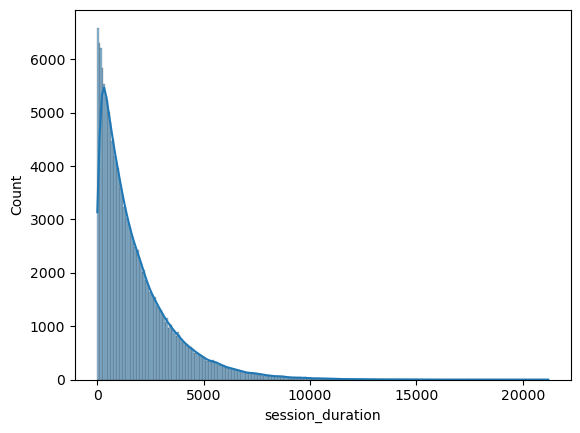

In [20]:
sns.histplot(data=sessions.session_duration, kde = 1)

<Axes: xlabel='duration_sec', ylabel='Count'>

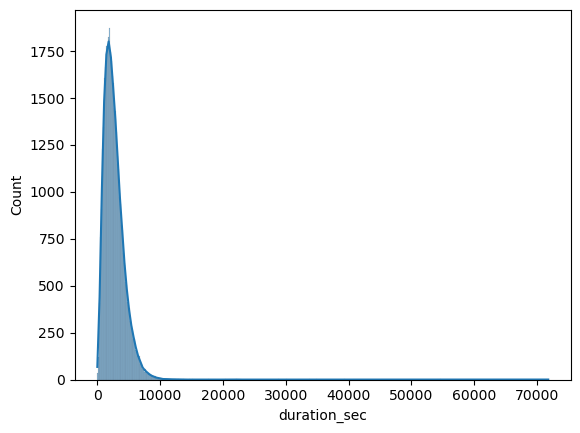

In [21]:
sns.histplot(data=tutorial_completed.duration_sec, kde = 1)

Оба распределения являются ненормальными

Разница между средним и медианным значениями длительности одной сессии значительна, это может говорить о том, что существует некоторое количество игроков, которых мало, но играют они очень долго.
Разница между средним и медианным значениями длительности прохождения туториала говорит о том, что существуют индивиды, для которых обучение показалось слишком сложным.

Задание 3. Исследование выбросов


<Axes: ylabel='duration_sec'>

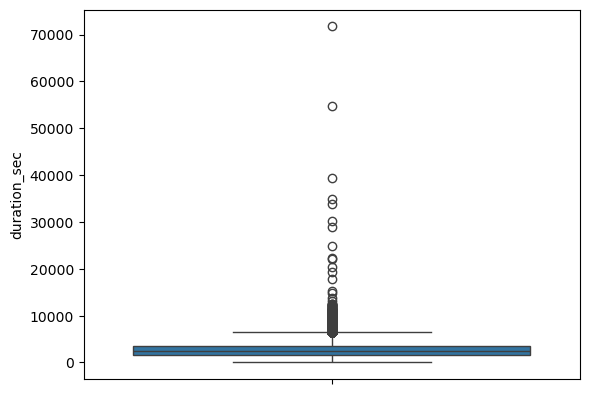

In [25]:
sns.boxplot(tutorial_completed.duration_sec)

<Axes: ylabel='session_duration'>

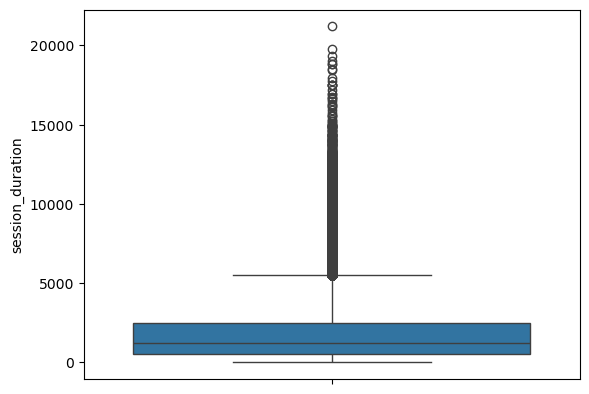

In [26]:
sns.boxplot(sessions.session_duration)

In [27]:
tutorial_completed.duration_sec.quantile(q = 0.99), sessions.session_duration.quantile(q = 0.99)

(7605.440000000002, 8323.137208860211)

Построив ящик с усами для обоих столбцов, посчитав 99% процентиль, можно сделать вывод, о том, что в обоих колонках существует немалое количество выбросов, которые "портили" распределение, среднее и медианное значение, другие статистические данные. От них нужно избавиться.

Задание 4. Сохранение данных в файл


In [30]:
tutorial_completed = tutorial_completed.query('duration_sec.quantile(q = 0.99)> duration_sec')
sessions = sessions.query('session_duration.quantile(q = 0.99)> session_duration')

<Axes: ylabel='duration_sec'>

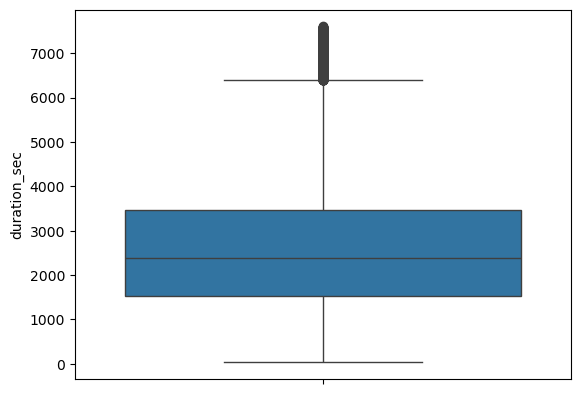

In [31]:
sns.boxplot(tutorial_completed.duration_sec)

<Axes: ylabel='session_duration'>

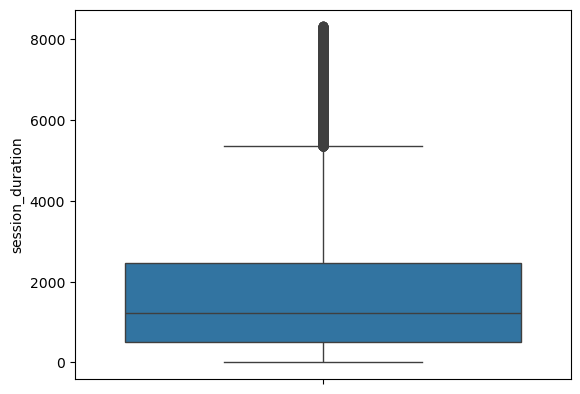

In [32]:
sns.boxplot(sessions.session_duration)

In [33]:
sessions.to_csv("sessions.csv")
tutorial_completed.to_csv("tutorial_completed.csv")

Задание 5. Фильтрация выбросов с помощью функции


In [35]:
def filter_outliers(df, col_name, border):
    return df.query(f'{col_name}.quantile(q={border}) > {col_name}')
dk = filter_outliers(t1, 'duration_sec', 0.95)

<Axes: ylabel='duration_sec'>

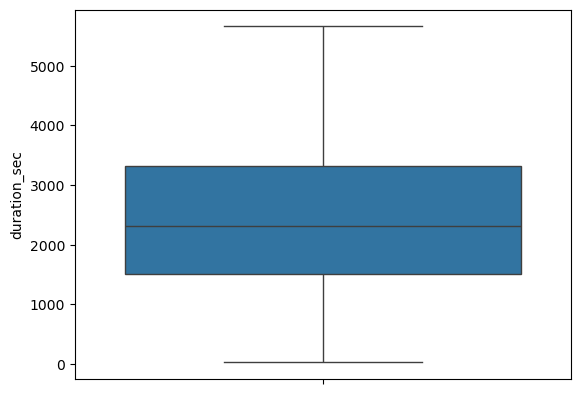

In [36]:
sns.boxplot(dk.duration_sec)

<Axes: ylabel='duration_sec'>

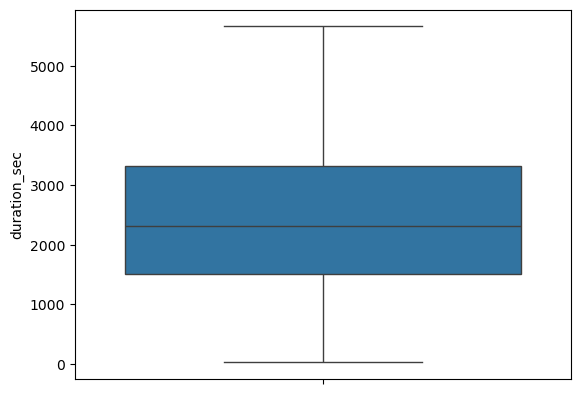

In [37]:
sns.boxplot(t1.query('duration_sec.quantile(q=0.95)>duration_sec').duration_sec)